## Scrapping Mcd App

In [1]:
!pip install google-play-scraper

In [2]:
import pandas as pd
from google_play_scraper import Sort, reviews_all

Scraping data adalah suatu teknik pengambilan dari satu atau lebih website,untuk mengambil data review dari aplikasi McDonald's diperlukan install library "google-play-scraper" kemudian import dan membuat fungsi untuk mengumpulkan data dengan parameter bahasa, negara, dan pengurutan yang paling relevan. Yang mana semua hasil pengumpulan data akan dikonversi dalam DataFrame dan menyimpannya dalam file CSV.

Singkatnya proses scraping ini dilakukan untuk mengumpulkan review aplikasi McDonald's dari Google Play Store, mengonversinya ke dalam DataFrame pandas, dan menyimpannya dalam file CSV sebagai dataset untuk analisis.

In [3]:
!python -m pip install --upgrade pip

In [4]:
!pip install nltk

NLTK adalah singkatan dari Natural Language Tool Kit, yaitu sebuah library yang digunakan untuk membantu pemrosesan data teks, yang mana ibrary ini memudahkan untuk memproses teks seperti melakukan classification, tokenization, stemming, tagging, parsing, dan semantic reasoning. 

sehingga pada kode ini adalah perintah menginstal pustaka Python bernama NLTK (Natural Language Toolkit).

In [5]:
!pip install wordcloud

WordCloud adalah library yang berguna untuk membuat representasi visual dari kumpulan kata-kata (teks) di mana ukuran kata-kata tersebut menunjukkan seberapa sering kata-kata tersebut muncul dalam teks. Pada kode ini menunjukkan perintah pengunduhan WordCloud untuk memberikan visualisasi tentang kata-kata yang paling sering muncul dalam suatu teks.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import contractions
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import ngrams
from nltk.probability import FreqDist
from wordcloud import WordCloud

# Prepareration Data

In [7]:
reviews_data = pd.read_csv("C:/Users/hp/Downloads/Mcdonals.csv")
reviews_data.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0aa82553-80f8-41bd-8fcf-4277b4737b9f,Mohammed AlShowaier,https://play-lh.googleusercontent.com/a-/ALV-U...,One of the worst apps I have used. The interfa...,1,1234,2.19.0,2021-05-06 00:20:51,NaN,NaN,2.19.0
1,7f3e1b40-45e8-4c59-9293-e04b3819c535,Alexandra Coscovelnita,https://play-lh.googleusercontent.com/a-/ALV-U...,"Chose a location and after paying, order was s...",1,2800,2.72.1,2023-09-09 17:16:16,NaN,NaN,2.72.1
2,89c5ce7b-dea9-44b4-8207-0eafe1200e7e,MG,https://play-lh.googleusercontent.com/a/ACg8oc...,"Getting worst and worst. Ordered using app, ga...",1,286,2.76.0,2023-11-12 07:59:39,NaN,NaN,2.76.0
3,c5ba339f-63d5-4618-9ecd-ffe7ea5e63dd,Tomas Valenta,https://play-lh.googleusercontent.com/a-/ALV-U...,"Still terrible user experience, after a year o...",1,95,2.76.0,2023-11-15 01:11:30,NaN,NaN,2.76.0
4,a1bebe41-7408-4349-8b1d-9d588b52c9f2,orangemiele p,https://play-lh.googleusercontent.com/a-/ALV-U...,"""There was a problem getting the location deta...",1,25,2.76.0,2023-11-17 10:27:57,NaN,NaN,2.76.0


Memanggil data hasil scrapping sebelumnya, yang mana hanya menampilkan 3 list terakhir dalam data. Setelah melakukan scraping di dapatkan jumlah data sebanyak 62191 baris

In [8]:
reviews_data = reviews_data.drop(0)
reviews_data.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
1,7f3e1b40-45e8-4c59-9293-e04b3819c535,Alexandra Coscovelnita,https://play-lh.googleusercontent.com/a-/ALV-U...,"Chose a location and after paying, order was s...",1,2800,2.72.1,2023-09-09 17:16:16,NaN,NaN,2.72.1
2,89c5ce7b-dea9-44b4-8207-0eafe1200e7e,MG,https://play-lh.googleusercontent.com/a/ACg8oc...,"Getting worst and worst. Ordered using app, ga...",1,286,2.76.0,2023-11-12 07:59:39,NaN,NaN,2.76.0
3,c5ba339f-63d5-4618-9ecd-ffe7ea5e63dd,Tomas Valenta,https://play-lh.googleusercontent.com/a-/ALV-U...,"Still terrible user experience, after a year o...",1,95,2.76.0,2023-11-15 01:11:30,NaN,NaN,2.76.0
4,a1bebe41-7408-4349-8b1d-9d588b52c9f2,orangemiele p,https://play-lh.googleusercontent.com/a-/ALV-U...,"""There was a problem getting the location deta...",1,25,2.76.0,2023-11-17 10:27:57,NaN,NaN,2.76.0
5,be016930-7d34-4b42-866f-0bc90e2b42e9,Jamie Moynihan,https://play-lh.googleusercontent.com/a-/ALV-U...,Wasted 15 mins putting in my order only to fin...,1,90,2.76.0,2023-11-15 02:21:24,NaN,NaN,2.76.0


Di sini, drop(0) akan menghapus baris dengan indeks 0 dari dataframe df. 
Karena kamiingin menghapus baris tertentu berdasarkan data terbarunya, pada baris 0 ternyata data tersebut pada tanggal 09/09/2021 sehingga kami akan drop data tersebut karena kami akan menggunakan data terbaru yaitu pada 2023.

In [9]:
reviews_data.drop(columns=["userName","userImage","reviewId","replyContent","thumbsUpCount","reviewCreatedVersion", "at","repliedAt","appVersion"], inplace=True)

Penghapusan beberapa kolom yang tidak dibutuhkan, seperti userName, userImage, reviewId, replyContent, thumbsUpCount, reviewCreatedVersion, at, repliedAt, appVersion dimana ini bertujuan untuk menyederhanakan struktur DataFrame atau jika kolom-kolom tersebut tidak diperlukan untuk analisis teks ini.

In [10]:
reviews_data.head()

,content,score
1,"Chose a location and after paying, order was s...",1
2,"Getting worst and worst. Ordered using app, ga...",1
3,"Still terrible user experience, after a year o...",1
4,"""There was a problem getting the location deta...",1
5,Wasted 15 mins putting in my order only to fin...,1


Menampilkan 5 baris pertama dengan metode .head() yang ana data ini merupakan data baru hasil dari penghapusan bebetapa kolom sebelumnya yang menyisakan 2 kolom saja

In [11]:
reviews_data.shape

(62191, 2)

Memeriksa jumlah kolom dan baris, yang terdapat 62192 baris dan 2 kolom

In [12]:
missing_values = reviews_data.isnull().sum()
print(missing_values)

content    1
score      0
dtype: int64


In [13]:
reviews_data.dropna(inplace=True)
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62190 entries, 1 to 62191
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  62190 non-null  object
 1   score    62190 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


* **Perluasan Kontraksi**

In [14]:
reviews_data['no_contractions'] = reviews_data['content'].apply(lambda x: [contractions.fix(word) for word in x.split()])
reviews_data.head()

,content,score,no_contractions
1,"Chose a location and after paying, order was s...",1,"[Chose, a, location, and, after, paying,, orde..."
2,"Getting worst and worst. Ordered using app, ga...",1,"[Getting, worst, and, worst., Ordered, using, ..."
3,"Still terrible user experience, after a year o...",1,"[Still, terrible, user, experience,, after, a,..."
4,"""There was a problem getting the location deta...",1,"[""There, was, a, problem, getting, the, locati..."
5,Wasted 15 mins putting in my order only to fin...,1,"[Wasted, 15, mins, putting, in, my, order, onl..."


Melakukan perluasan contractions (kontraksi) dengan menambahkan kolom baru yang menangpung isi dari kolom content tetapi dalam bentuk per kata yang diperluas ke bentuk aslinya. 

Menggunakan fungsi lambda untuk mengamnil teks dari kolom 'content' lalu membagi per kata menggunakan 'c.split()' dan library contractions sendiri untuk menampilkan ersi singkat dari sebuah kata. Sehingga di dapatkan bentuk asli (per kata) dari kalimat atau teks dalma kolom content

* **Menghapus Tanda Baca**

In [15]:
reviews_data['reviews_no_contractions'] = [' '.join(l) for l in reviews_data['no_contractions']]
reviews_data.head()

,content,score,no_contractions,reviews_no_contractions
1,"Chose a location and after paying, order was s...",1,"[Chose, a, location, and, after, paying,, orde...","Chose a location and after paying, order was s..."
2,"Getting worst and worst. Ordered using app, ga...",1,"[Getting, worst, and, worst., Ordered, using, ...","Getting worst and worst. Ordered using app, ga..."
3,"Still terrible user experience, after a year o...",1,"[Still, terrible, user, experience,, after, a,...","Still terrible user experience, after a year o..."
4,"""There was a problem getting the location deta...",1,"[""There, was, a, problem, getting, the, locati...","""There was a problem getting the location deta..."
5,Wasted 15 mins putting in my order only to fin...,1,"[Wasted, 15, mins, putting, in, my, order, onl...",Wasted 15 mins putting in my order only to fin...


Jika sebelumnya tiap kata pada kolom no_contractions dipisahkan menggunakan, maka kali ini melakukan penambahan kolom baru yang berisikan teks pada no_contractions tetapi dengan versi per katanya di pidahkan oleh spasi dengan kata lain dilakukan pula penghilangan tanda baca karena  tanda baca tidak diperlukan untuk analisis teks dan tidak menyampaikan makna yang signifikan. Sehingga di dapatkan  kolom baru ('reviews_no_contractions') yang berisi teks dari kolom 'no_contractions', tetapi setiap kata di dalamnya dipisahkan oleh spasi dengan hanya menampilkan 7 baris data teratas.

* **Melakukan tokenisasi**

Tokenisasi melibatkan pemecahan teks menjadi lebih kecil potongan, misalnya kata atau frasa.

In [16]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_no_contractions'].apply(word_tokenize)
reviews_data.head()

,content,score,no_contractions,reviews_no_contractions,reviews_tokenized
1,"Chose a location and after paying, order was s...",1,"[Chose, a, location, and, after, paying,, orde...","Chose a location and after paying, order was s...","[Chose, a, location, and, after, paying, ,, or..."
2,"Getting worst and worst. Ordered using app, ga...",1,"[Getting, worst, and, worst., Ordered, using, ...","Getting worst and worst. Ordered using app, ga...","[Getting, worst, and, worst, ., Ordered, using..."
3,"Still terrible user experience, after a year o...",1,"[Still, terrible, user, experience,, after, a,...","Still terrible user experience, after a year o...","[Still, terrible, user, experience, ,, after, ..."
4,"""There was a problem getting the location deta...",1,"[""There, was, a, problem, getting, the, locati...","""There was a problem getting the location deta...","[``, There, was, a, problem, getting, the, loc..."
5,Wasted 15 mins putting in my order only to fin...,1,"[Wasted, 15, mins, putting, in, my, order, onl...",Wasted 15 mins putting in my order only to fin...,"[Wasted, 15, mins, putting, in, my, order, onl..."


Memperbarui DAtaFrame dengan menambahkan kolom baru  ('reviews_tokenized') yang berisi ulasan dari kolom 'reviews_no_contractions', tetapi setiap ulasan dipecah menjadi token (kata-kata). Untuk mengubah kata menjadi token atau list kata ini menggunkan fungsi 'word_tokenize' yang dibantu dengan metode apply. Step ini berguna untuk analisis lebih lanjut, seperti penghitungan frekuensi kata atau analisis sentimen.

* **Konversi ke Huruf Kecil**

In [17]:
reviews_data['reviews_lower'] = reviews_data['reviews_tokenized'].apply(lambda x: [word.lower() for word in x])
reviews_data.head()

,content,score,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower
1,"Chose a location and after paying, order was s...",1,"[Chose, a, location, and, after, paying,, orde...","Chose a location and after paying, order was s...","[Chose, a, location, and, after, paying, ,, or...","[chose, a, location, and, after, paying, ,, or..."
2,"Getting worst and worst. Ordered using app, ga...",1,"[Getting, worst, and, worst., Ordered, using, ...","Getting worst and worst. Ordered using app, ga...","[Getting, worst, and, worst, ., Ordered, using...","[getting, worst, and, worst, ., ordered, using..."
3,"Still terrible user experience, after a year o...",1,"[Still, terrible, user, experience,, after, a,...","Still terrible user experience, after a year o...","[Still, terrible, user, experience, ,, after, ...","[still, terrible, user, experience, ,, after, ..."
4,"""There was a problem getting the location deta...",1,"[""There, was, a, problem, getting, the, locati...","""There was a problem getting the location deta...","[``, There, was, a, problem, getting, the, loc...","[``, there, was, a, problem, getting, the, loc..."
5,Wasted 15 mins putting in my order only to fin...,1,"[Wasted, 15, mins, putting, in, my, order, onl...",Wasted 15 mins putting in my order only to fin...,"[Wasted, 15, mins, putting, in, my, order, onl...","[wasted, 15, mins, putting, in, my, order, onl..."


Membuat kolom baru 'reviews_lower' dimana berisi teks dari kolom 'reviews_tokenized' yang sudah distandarisasi, sehingga setiap kata di dalamnya diubah menjadi huruf kecil (lowercase) menggunakan fungsi lambda yang diterapkan pada setiap daftar kata-kata (token). 


* **Menghapus tanda baca dalam kolom reviews_lower**

In [18]:
punctuations = string.punctuation
reviews_data['reviews_no_punctuation'] = reviews_data['reviews_lower'].apply(lambda x: [word for word in x if word not in punctuations])
reviews_data.head()

,content,score,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower,reviews_no_punctuation
1,"Chose a location and after paying, order was s...",1,"[Chose, a, location, and, after, paying,, orde...","Chose a location and after paying, order was s...","[Chose, a, location, and, after, paying, ,, or...","[chose, a, location, and, after, paying, ,, or...","[chose, a, location, and, after, paying, order..."
2,"Getting worst and worst. Ordered using app, ga...",1,"[Getting, worst, and, worst., Ordered, using, ...","Getting worst and worst. Ordered using app, ga...","[Getting, worst, and, worst, ., Ordered, using...","[getting, worst, and, worst, ., ordered, using...","[getting, worst, and, worst, ordered, using, a..."
3,"Still terrible user experience, after a year o...",1,"[Still, terrible, user, experience,, after, a,...","Still terrible user experience, after a year o...","[Still, terrible, user, experience, ,, after, ...","[still, terrible, user, experience, ,, after, ...","[still, terrible, user, experience, after, a, ..."
4,"""There was a problem getting the location deta...",1,"[""There, was, a, problem, getting, the, locati...","""There was a problem getting the location deta...","[``, There, was, a, problem, getting, the, loc...","[``, there, was, a, problem, getting, the, loc...","[``, there, was, a, problem, getting, the, loc..."
5,Wasted 15 mins putting in my order only to fin...,1,"[Wasted, 15, mins, putting, in, my, order, onl...",Wasted 15 mins putting in my order only to fin...,"[Wasted, 15, mins, putting, in, my, order, onl...","[wasted, 15, mins, putting, in, my, order, onl...","[wasted, 15, mins, putting, in, my, order, onl..."


Membuat kolom baru 'reviews_no_punctuation' yang berisi teks dari kolom 'reviews_lower', tetapi setiap kata di dalamnya tidak mengandung tanda baca.Jadi yang ada dalam kolom tersebut adalah daftar kata-kata saja tanpa atau yang tidak termasuk tanda baca, hal ini dilakukan untuk  membersihkan teks dan fokus pada konten kata-kata.

* **Konversi menjadi string**

In [19]:
reviews_data['reviews_cleaned'] = [' '.join(l) for l in reviews_data['reviews_no_punctuation']]
reviews_data.head()

,content,score,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower,reviews_no_punctuation,reviews_cleaned
1,"Chose a location and after paying, order was s...",1,"[Chose, a, location, and, after, paying,, orde...","Chose a location and after paying, order was s...","[Chose, a, location, and, after, paying, ,, or...","[chose, a, location, and, after, paying, ,, or...","[chose, a, location, and, after, paying, order...",chose a location and after paying order was se...
2,"Getting worst and worst. Ordered using app, ga...",1,"[Getting, worst, and, worst., Ordered, using, ...","Getting worst and worst. Ordered using app, ga...","[Getting, worst, and, worst, ., Ordered, using...","[getting, worst, and, worst, ., ordered, using...","[getting, worst, and, worst, ordered, using, a...",getting worst and worst ordered using app gave...
3,"Still terrible user experience, after a year o...",1,"[Still, terrible, user, experience,, after, a,...","Still terrible user experience, after a year o...","[Still, terrible, user, experience, ,, after, ...","[still, terrible, user, experience, ,, after, ...","[still, terrible, user, experience, after, a, ...",still terrible user experience after a year or...
4,"""There was a problem getting the location deta...",1,"[""There, was, a, problem, getting, the, locati...","""There was a problem getting the location deta...","[``, There, was, a, problem, getting, the, loc...","[``, there, was, a, problem, getting, the, loc...","[``, there, was, a, problem, getting, the, loc...",`` there was a problem getting the location de...
5,Wasted 15 mins putting in my order only to fin...,1,"[Wasted, 15, mins, putting, in, my, order, onl...",Wasted 15 mins putting in my order only to fin...,"[Wasted, 15, mins, putting, in, my, order, onl...","[wasted, 15, mins, putting, in, my, order, onl...","[wasted, 15, mins, putting, in, my, order, onl...",wasted 15 mins putting in my order only to fin...


Kolom baru (reviews_cleaned) dibuat yang berisi teks dari kolom 'reviews_no_punctuation', yang mana setiap teks telah dibersihkan dari tanda baca dan kata-kata yang tidak diinginkan .Dimana semula pada kolom 'no_punctuations' masih diperluas dengan bentuk list diubah menjadi bentuk string atau teks lengkap. Jadi kolom ini berisi teks yang lengkap setelah proses preparation data sebelumnya

In [20]:
reviews_data[['content','score','reviews_cleaned']].to_csv('C:/Users/hp/Downloads/cleaned_reviews_data.csv',index = False)

Dari semua proses preparation hanya diambil 3 kolom saja untuk membentuk DataFrame baru dalm bentuk CSV dengan kolom 'content','score','reviews_cleaned' dimana data ini yang akan dugunakan sebagai dataset untuk pross analisis lebih lanjut.

## Dealing With Stop Words
on, now, was, dst. Digunakan agar mereview secara relevan dan harus ditonjolkan, apakah kebanyakan review menyatakan kata sifat yang mempengaruhi data tersebut. misal di sebuah aplikasi, ,maka kata yang sering muncul seperti promonya banyak, aplikasinya lemot, error, lancar, mudah enak,dll. Agar kita mendapat insight yang lebih relevan 

In [22]:
Reviews_data = pd.read_csv('C:/Users/hp/Downloads/cleaned_reviews_data.csv')
Reviews_data.head()

,content,score,reviews_cleaned
0,"Chose a location and after paying, order was s...",1,chose a location and after paying order was se...
1,"Getting worst and worst. Ordered using app, ga...",1,getting worst and worst ordered using app gave...
2,"Still terrible user experience, after a year o...",1,still terrible user experience after a year or...
3,"""There was a problem getting the location deta...",1,`` there was a problem getting the location de...
4,Wasted 15 mins putting in my order only to fin...,1,wasted 15 mins putting in my order only to fin...


In [23]:
Reviews_data.shape

(62190, 3)

**1. Tokenisasi Data**

In [24]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned'].apply(word_tokenize)

**2. Menggabungkan semua kata yang sudah di tokensisasi dalam list**

In [25]:
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

**3. Menghitung frekuensi tiap kata**

In [26]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
           
    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:20]

**4. Membuat list semua kata yang sudah di tokenisasi**

In [27]:
reviews = reviews_data['reviews_tokenized']
reviews_words = combine_words(reviews)
reviews_words[:10]
['chose','a','location','and','after','paying','order','was','sent','to','another','location','is','was','very','frustrating','for','me','for','the','restaurants','had','to','phone','in','created','a','lot','of','inconvenience','for','the','two','restaurants','but','also','for','me','got','the','order','in','the','end','but','by','moving','a','lot','of','parts','there','is','no','cancel','order','button','and','no','way','to','receive','money','back','if','you','order','through','the','app','the','restaurant','managers','were','great','and','helped','us','out','but','the','app','created','a','lot','of','inconvenience','for','all','of','us',
'getting','worst','and','worst','ordered','using','app','gave','me','an','order','number','credit','card','was','billed','after','a','long','wait','check','the','apps','and','found','the','order','disappeared','the','manager','was','informed','but','nothing','can','be','done','either','you','reorder','and','wait','or','just','leave','and','filed','thru','the','apps','for','refund','which','took','ages','never','happened','i','had','to','contact','my','credit','card','to','cancelled','the','transaction','which','they','did','help','on','it','nowadays','skeptical','to','use','the','apps','for','any','purchase',
'still','terrible','user','experience','after','a','year','or','more','no','one','bothered','to','fix','this','problem','every','single','menu','page','you','open','asks','to','confirm','cookies','there','is','no','way','to','get','rid','of','this','and','it','jumps','like','crazy','this','is','a','joke',
'there','was','a','problem','getting','the','location','details','my','internet','is','working','i','re-downloaded','the','app','several','times','my','account','is','logged','in','i','literally','live','on','the','main','road','of','my','village','my','village','is','in','metro','manila','and','it','still','does','not','work','grab','and','the','jollibee','app','has','a','better','locator','do','not','you','dare','tell','me','to','turn','off','and','turn','on','my','device','again','the','delivery','locator','does','not','work',
'there','was','a','bug','on','lipton','promo','peso','deal','i','entered','my','newly','open','lipton','and','type','the','code','then','it','shows','i','could','only','claim','per','day','i','was','confused','because','it','my','first','time','doing','this','and','then','i','tried','to','find','it','first','the','deal','was','not','there','so','i','tried','to','input','the','code','again','and','it','shows','its','already','claimed','so','the','piso','deal','was','gone','and','i','have','2','lipton','and','no','mcchiken','too','bad','i','did','not','screenshot','it','it','could','have','been','a','great','help',
'can','not','pay','with','card','when','paying','it','opens','the','browser','to','authorize','payment','but','after','that','is','done','it','opens','a','blank','tab','instead','of','redirect','back','to','the','app','trying','to','click','the','link','on','the','previous','tab','just','opens','another','blank','tab','the','app','just','perpetually','process','payment','i','am','writing','this','here','because','there','is','nowhere','in','the','app','to','report','an','issue','the','feedback','menu','opens','a','survey','the','contact','us','is','only','about','a','particular','branch','but','not','the','app','itself','it','is','like','you','do','not','want','feedback']

['chose',
 'a',
 'location',
 'and',
 'after',
 'paying',
 'order',
 'was',
 'sent',
 'to',
 'another',
 'location',
 'is',
 'was',
 'very',
 'frustrating',
 'for',
 'me',
 'for',
 'the',
 'restaurants',
 'had',
 'to',
 'phone',
 'in',
 'created',
 'a',
 'lot',
 'of',
 'inconvenience',
 'for',
 'the',
 'two',
 'restaurants',
 'but',
 'also',
 'for',
 'me',
 'got',
 'the',
 'order',
 'in',
 'the',
 'end',
 'but',
 'by',
 'moving',
 'a',
 'lot',
 'of',
 'parts',
 'there',
 'is',
 'no',
 'cancel',
 'order',
 'button',
 'and',
 'no',
 'way',
 'to',
 'receive',
 'money',
 'back',
 'if',
 'you',
 'order',
 'through',
 'the',
 'app',
 'the',
 'restaurant',
 'managers',
 'were',
 'great',
 'and',
 'helped',
 'us',
 'out',
 'but',
 'the',
 'app',
 'created',
 'a',
 'lot',
 'of',
 'inconvenience',
 'for',
 'all',
 'of',
 'us',
 'getting',
 'worst',
 'and',
 'worst',
 'ordered',
 'using',
 'app',
 'gave',
 'me',
 'an',
 'order',
 'number',
 'credit',
 'card',
 'was',
 'billed',
 'after',
 'a',
 '

**5. Menampilkan DataFrame**

In [28]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
16,the,20103
145,not,18930
44,app,17980
88,i,15999
9,to,14739


Semua step di atas merupakan proses menggabungkan kata-kata dari review yang telah dibersihkan dan menghitung frekuensinya, kemudian mengembalikan DataFrame yang berisi 20 kata teratas bersama dengan frekuensinya. Dimana pertama memberikan token pada tiap kata seperti sebelumnya di data preparation, kemudian semua kata di tampung dalam argumen 'all_word' dan semua list kata tersebut ditampilkan pada step 4. Selanjutnya dengan menggunakan fungsi 'count_topwords' kita dapatt menghitung frekuensi tiap kata dalam list 'all_word', setelah perhitungan selesai akan dibuat DataFrame yang menampilkan 5 data teratas dengan nilai frekuensi terbesar hingga terkecil.

note:: ini penjelasan 5 step di atas ya

**6. Visualisasi topword**

<AxesSubplot:xlabel='words', ylabel='word_count'>

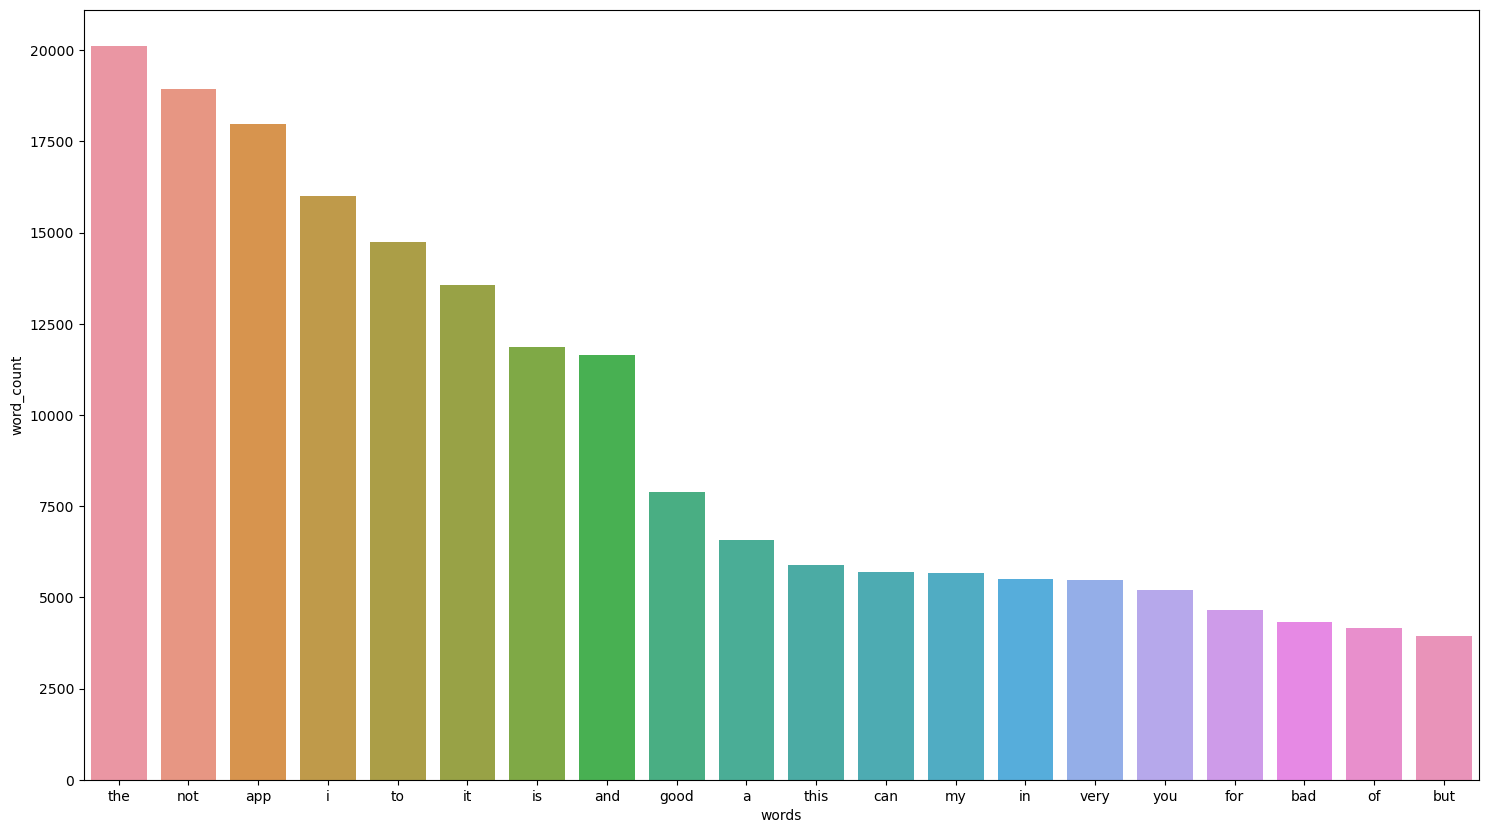

In [29]:
plt.figure(figsize= (18,10))
sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

Berdasarkan DataFrame sebelumnya dan barplot di atas menunjukkan bahwa kata 'the' menjadi kata yang paling sering muncul yaitu sebanyak 20.109 kali pada semua review, kemudian disusul kata 'not' muncul sebanyak 18.932. Sedangkan kata yang jarang muncul <5000 kali.

**note: ini hasil topword masih include stopword nya**

* **Penghapusan StopWords**

In [30]:
stop_words = set(stopwords.words('English'))
reviews_data['reviews_no_stopwords'] = reviews_data['reviews_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
reviews_data.head()

,content,score,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower,reviews_no_punctuation,reviews_cleaned,reviews_no_stopwords
1,"Chose a location and after paying, order was s...",1,"[Chose, a, location, and, after, paying,, orde...","Chose a location and after paying, order was s...","[chose, a, location, and, after, paying, order...","[chose, a, location, and, after, paying, ,, or...","[chose, a, location, and, after, paying, order...",chose a location and after paying order was se...,"[chose, location, paying, order, sent, another..."
2,"Getting worst and worst. Ordered using app, ga...",1,"[Getting, worst, and, worst., Ordered, using, ...","Getting worst and worst. Ordered using app, ga...","[getting, worst, and, worst, ordered, using, a...","[getting, worst, and, worst, ., ordered, using...","[getting, worst, and, worst, ordered, using, a...",getting worst and worst ordered using app gave...,"[getting, worst, worst, ordered, using, app, g..."
3,"Still terrible user experience, after a year o...",1,"[Still, terrible, user, experience,, after, a,...","Still terrible user experience, after a year o...","[still, terrible, user, experience, after, a, ...","[still, terrible, user, experience, ,, after, ...","[still, terrible, user, experience, after, a, ...",still terrible user experience after a year or...,"[still, terrible, user, experience, year, one,..."
4,"""There was a problem getting the location deta...",1,"[""There, was, a, problem, getting, the, locati...","""There was a problem getting the location deta...","[``, there, was, a, problem, getting, the, loc...","[``, there, was, a, problem, getting, the, loc...","[``, there, was, a, problem, getting, the, loc...",`` there was a problem getting the location de...,"[``, problem, getting, location, details, ``, ..."
5,Wasted 15 mins putting in my order only to fin...,1,"[Wasted, 15, mins, putting, in, my, order, onl...",Wasted 15 mins putting in my order only to fin...,"[wasted, 15, mins, putting, in, my, order, onl...","[wasted, 15, mins, putting, in, my, order, onl...","[wasted, 15, mins, putting, in, my, order, onl...",wasted 15 mins putting in my order only to fin...,"[wasted, 15, mins, putting, order, find, use, ..."


Menambahkan kolom baru yaitu (reviews_no_stopwords) menggunakan  metode aplly dan lambda yang bekerja sama untuk membuat list baru yang mana hanya bukan termasuk stopword yang dimasukkan dalam list baru terbebut. Sehingga kolom baru tersebut berisi teks dari kolom 'reviews_tokenized', dimana setiap teks telah dihilangkan stopword nya.

* **Konversi dari list ke String**

In [31]:
reviews_data['reviews_cleaned_stopwords'] = [' '.join(l) for l in reviews_data['reviews_no_stopwords']]
reviews_data.head()

,content,score,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower,reviews_no_punctuation,reviews_cleaned,reviews_no_stopwords,reviews_cleaned_stopwords
1,"Chose a location and after paying, order was s...",1,"[Chose, a, location, and, after, paying,, orde...","Chose a location and after paying, order was s...","[chose, a, location, and, after, paying, order...","[chose, a, location, and, after, paying, ,, or...","[chose, a, location, and, after, paying, order...",chose a location and after paying order was se...,"[chose, location, paying, order, sent, another...",chose location paying order sent another locat...
2,"Getting worst and worst. Ordered using app, ga...",1,"[Getting, worst, and, worst., Ordered, using, ...","Getting worst and worst. Ordered using app, ga...","[getting, worst, and, worst, ordered, using, a...","[getting, worst, and, worst, ., ordered, using...","[getting, worst, and, worst, ordered, using, a...",getting worst and worst ordered using app gave...,"[getting, worst, worst, ordered, using, app, g...",getting worst worst ordered using app gave ord...
3,"Still terrible user experience, after a year o...",1,"[Still, terrible, user, experience,, after, a,...","Still terrible user experience, after a year o...","[still, terrible, user, experience, after, a, ...","[still, terrible, user, experience, ,, after, ...","[still, terrible, user, experience, after, a, ...",still terrible user experience after a year or...,"[still, terrible, user, experience, year, one,...",still terrible user experience year one bother...
4,"""There was a problem getting the location deta...",1,"[""There, was, a, problem, getting, the, locati...","""There was a problem getting the location deta...","[``, there, was, a, problem, getting, the, loc...","[``, there, was, a, problem, getting, the, loc...","[``, there, was, a, problem, getting, the, loc...",`` there was a problem getting the location de...,"[``, problem, getting, location, details, ``, ...",`` problem getting location details `` interne...
5,Wasted 15 mins putting in my order only to fin...,1,"[Wasted, 15, mins, putting, in, my, order, onl...",Wasted 15 mins putting in my order only to fin...,"[wasted, 15, mins, putting, in, my, order, onl...","[wasted, 15, mins, putting, in, my, order, onl...","[wasted, 15, mins, putting, in, my, order, onl...",wasted 15 mins putting in my order only to fin...,"[wasted, 15, mins, putting, order, find, use, ...",wasted 15 mins putting order find use vouchers...


Menambahkan kolom baru ('reviews_cleaned_stopwords') dengan melakukan iterasi pada kolom 'reviews_no_stopwords' kemudian semua teks dalam kolom tersebut diubah menjadi string. Sehingga menghasilkan kolom baru yang berisi teks dari kolom 'reviews_no_stopwords' dengan setiap teks telah digabungkan kembali menjadi teks yang lengkap. 

In [32]:
reviews_no_stopwords = reviews_data['reviews_no_stopwords']
reviews_words = combine_words(reviews_no_stopwords)
reviews_words[:10]
['chose', 'location', 'paying', 'order', 'sent', 'another', 'location', 'frustrating', 'restaurants', 'phone', 'created', 'lot', 'inconvenience', 'two', 'restaurants', 'also', 'got', 'order', 'end', 'moving', 'lot', 'parts', 'cancel', 'order', 'button', 'way', 'receive', 'money', 'back', 'order', 'app', 'restaurant', 'managers', 'great', 'helped', 'us', 'app', 'created', 'lot', 'inconvenience', 'us',
 'getting', 'worst', 'worst', 'ordered', 'using', 'app', 'gave', 'order', 'number', 'credit', 'card', 'billed', 'long', 'wait', 'check', 'apps', 'found', 'order', 'disappeared', 'manager', 'informed', 'nothing', 'done', 'either', 'reorder', 'wait', 'leave', 'filed', 'thru', 'apps', 'refund', 'took', 'ages', 'never', 'happened', 'contact', 'credit', 'card', 'cancelled', 'transaction', 'help', 'nowadays', 'skeptical', 'use', 'apps', 'purchase',
 'still', 'terrible', 'user', 'experience', 'year', 'one', 'bothered', 'fix', 'problem', 'every', 'single', 'menu', 'page', 'open', 'asks', 'confirm', 'cookies', 'way', 'get', 'rid', 'jumps', 'like', 'crazy', 'joke',
 '``', 'problem', 'getting', 'location', 'details', '``', 'internet', 'working', 're-downloaded', 'app', 'several', 'times', 'account', 'logged', 'literally', 'live', 'main', 'road', 'village', 'village', 'metro', 'manila', 'still', 'work', 'grab', 'jollibee', 'app', 'better', 'locator', 'dare', 'tell', 'turn', 'turn', 'device', 'delivery', 'locator', 'work',
 'wasted', '15', 'mins', 'putting', 'order', 'find', 'use', 'vouchers', 'self', 'serve', 'machine', 'went', 'counter', 'order', 'told', 'extra', 'value', 'medium', 'meal', 'deal', 'include', 'mcplant', 'extra', 'value', 'meal', 'complained', 'would', 'enter', 'order', 'wanted', 'use', 'voucher', '..', 'waste', 'time', 'app', 'use', 'deals',
 'bug', 'lipton', 'promo', 'peso', 'deal', 'entered', 'newly', 'open', 'lipton', 'type', 'code', 'shows', 'could', 'claim', 'per', 'day', 'confused', 'first', 'time', 'tried', 'find', 'first', 'deal', 'tried', 'input', 'code', 'shows', 'already', 'claimed', 'piso', 'deal', 'gone', '2', 'lipton', 'mcchiken', 'bad', 'screenshot', 'could', 'great', 'help',
 'pay', 'card', 'paying', 'opens', 'browser', 'authorize', 'payment', 'done', 'opens', 'blank', 'tab', 'instead', 'redirect', 'back', 'app', 'trying', 'click', 'link', 'previous', 'tab', 'opens', 'another', 'blank', 'tab', 'app', 'perpetually', 'process', 'payment', 'writing', 'nowhere', 'app', 'report', 'issue', 'feedback', 'menu', 'opens', 'survey', 'contact', 'us', 'particular', 'branch', 'app', 'like', 'want', 'feedback',
 'worth', 'downloading', 'dowloaded', 'minute', 'ago', 'app', 'confusing', 'direct', 'delivery', 'service', 'order', 'taking', 'buggy', 'determine', 'location', 'even', 'upload', 'photo', 'map', 'phone', 'call', 'instead', 'finished', 'could', 'even', 'understand', 'app',
 'head', 'office', 'sa', 'would', 'pretty', 'angry', 'lack', 'basic', 'ux', 'functionality', 'points', 'work', 'buttons', 'options', 'refresh', 'app', 'page', 'level', 'service', 'would', 'expect', 'anc', 'fast', 'food', 'place', 'surprising', 'shocking',
 'great', 'first', 'get', 'cheaper', 'deals', 'store', 'menu', 'however', 'recently', 'new', 'updates', 'offers', 'realized', 'discount', 'gone', 'small', 'one', 'thing', 'found', 'well', 'prices', 'different', 'compared', 'co-workers', 'mcdo', 'app', 'like', 'example', 'new', 'offer', 'double', 'oreo', 'mcflurry', 'retails', '₱109', 'app', 'co-worker', 'phone', '₱99', 'like', 'wth', 'fix', 'mcdo',
 'food', 'factory', 'good', 'amazing',
 'bad', 'app', 'slow', 'working', 'suitable', 'app', 'per', 'companys', 'name', 'bad',
 'waste', 'time', 'mbs', 'application', 'working',
 'login', 'new', 'update', '😕',
 'free', 'burger',
 'thanks', 'mcdo',
 'thanks', 'mcdonald',
 'save', 'ghazza',
 'poor', 'app',
 'free', 'phalastine',
 'bad', 'boycott', 'terrorist', 'easy', 'heng',
 'best', 'app']

['chose',
 'location',
 'paying',
 'order',
 'sent',
 'another',
 'location',
 'frustrating',
 'restaurants',
 'phone',
 'created',
 'lot',
 'inconvenience',
 'two',
 'restaurants',
 'also',
 'got',
 'order',
 'end',
 'moving',
 'lot',
 'parts',
 'cancel',
 'order',
 'button',
 'way',
 'receive',
 'money',
 'back',
 'order',
 'app',
 'restaurant',
 'managers',
 'great',
 'helped',
 'us',
 'app',
 'created',
 'lot',
 'inconvenience',
 'us',
 'getting',
 'worst',
 'worst',
 'ordered',
 'using',
 'app',
 'gave',
 'order',
 'number',
 'credit',
 'card',
 'billed',
 'long',
 'wait',
 'check',
 'apps',
 'found',
 'order',
 'disappeared',
 'manager',
 'informed',
 'nothing',
 'done',
 'either',
 'reorder',
 'wait',
 'leave',
 'filed',
 'thru',
 'apps',
 'refund',
 'took',
 'ages',
 'never',
 'happened',
 'contact',
 'credit',
 'card',
 'cancelled',
 'transaction',
 'help',
 'nowadays',
 'skeptical',
 'use',
 'apps',
 'purchase',
 'still',
 'terrible',
 'user',
 'experience',
 'year',
 'one',


In [33]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
24,app,17980
362,good,7888
167,bad,4325
3,order,3729
140,..,2885


Menggabungkan tiap kata di kolom 'reviews_no_stopwords' dalam bentuk list, kemudian tiap kata tersebut dihitung frekuensinya sehingga menampilkan 5 data teratas top word dari data yang sudah dibersihkan stopwordnya.

<AxesSubplot:xlabel='words', ylabel='word_count'>

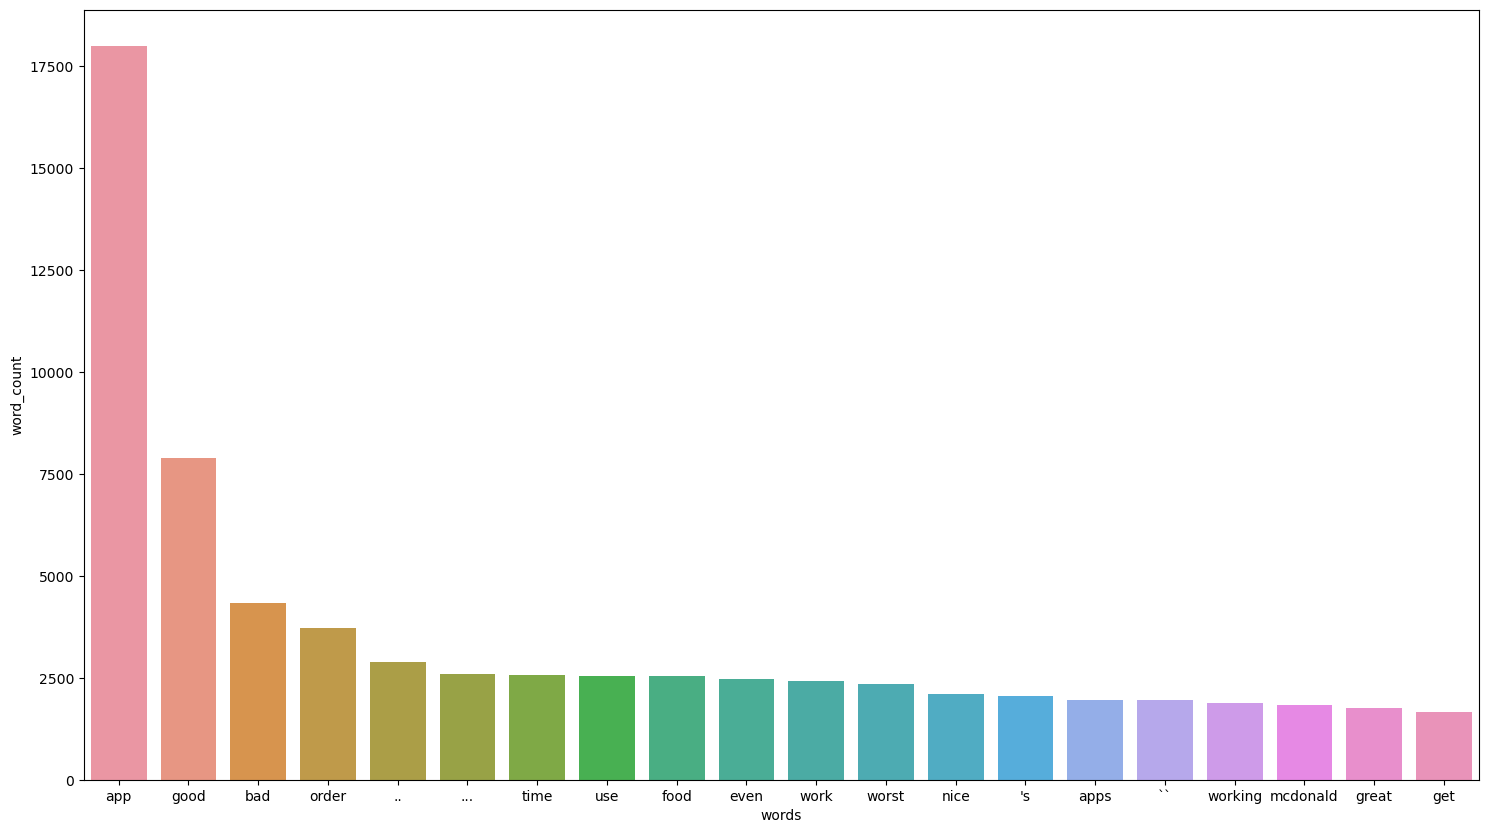

In [34]:
plt.figure(figsize= (18,10))
sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

Berdasarkan Dataframe dan visualisasi barplot di atas dapat dilihat bahwa kata 'app' menjadi kata yang sering muncul dalam dalam semua review yaitu sebanyak 17.983 kemudian kedua ada kata 'good' sebanyak 7.888. Sedangkan kata yang jarang atau paling sedikit muncul adalah kata 'get' yaitu sebanyak  <2.500 kali

In [35]:
reviews_data[['content','score',"reviews_cleaned",'reviews_cleaned_stopwords']].to_csv("C:/Users/hp/Downloads/cleaned_reviews_no_stopwords_data.csv",index = False)

## Analyzing Part Of Speech
Nouns, verbs, adjective, adverb

**1. Panggil, tampilkan, dan periksa jumlah data**


In [36]:
reviews_data = pd.read_csv("C:/Users/hp/Downloads/cleaned_reviews_no_stopwords_data.csv")

In [37]:
reviews_data.head()

,content,score,reviews_cleaned,reviews_cleaned_stopwords
0,"Chose a location and after paying, order was s...",1,chose a location and after paying order was se...,chose location paying order sent another locat...
1,"Getting worst and worst. Ordered using app, ga...",1,getting worst and worst ordered using app gave...,getting worst worst ordered using app gave ord...
2,"Still terrible user experience, after a year o...",1,still terrible user experience after a year or...,still terrible user experience year one bother...
3,"""There was a problem getting the location deta...",1,`` there was a problem getting the location de...,`` problem getting location details `` interne...
4,Wasted 15 mins putting in my order only to fin...,1,wasted 15 mins putting in my order only to fin...,wasted 15 mins putting order find use vouchers...


In [38]:
reviews_data.shape

(62190, 4)

**2. Hapus missing value**

In [39]:
reviews_data = reviews_data.dropna()

**3. Melakukan tokenisasi**

seperti sebelumnya yupp (dibuat kolom baru)

In [40]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned_stopwords'].apply(word_tokenize)

**4. Membuat tag part of Speech**

In [41]:
reviews_data['reviews_pos_tags'] = reviews_data['reviews_tokenized'].apply(nltk.tag.pos_tag)
reviews_data.head()

,content,score,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_pos_tags
0,"Chose a location and after paying, order was s...",1,chose a location and after paying order was se...,chose location paying order sent another locat...,"[chose, location, paying, order, sent, another...","[(chose, JJ), (location, NN), (paying, VBG), (..."
1,"Getting worst and worst. Ordered using app, ga...",1,getting worst and worst ordered using app gave...,getting worst worst ordered using app gave ord...,"[getting, worst, worst, ordered, using, app, g...","[(getting, VBG), (worst, JJS), (worst, RB), (o..."
2,"Still terrible user experience, after a year o...",1,still terrible user experience after a year or...,still terrible user experience year one bother...,"[still, terrible, user, experience, year, one,...","[(still, RB), (terrible, JJ), (user, NN), (exp..."
3,"""There was a problem getting the location deta...",1,`` there was a problem getting the location de...,`` problem getting location details `` interne...,"[``, problem, getting, location, details, ``, ...","[(``, ``), (problem, NN), (getting, VBG), (loc..."
4,Wasted 15 mins putting in my order only to fin...,1,wasted 15 mins putting in my order only to fin...,wasted 15 mins putting order find use vouchers...,"[wasted, 15, mins, putting, order, find, use, ...","[(wasted, VBD), (15, CD), (mins, NNS), (puttin..."


Melakukan tag pos ini menggunakan fungsi 'pos_tag' yang mana tag pos sendiri memberikan informasi tentang jenis kata mulai Nouns, verbs, adjective, adverbbenda, dan juga digunakan untuk analisis lebih lanjut terkait struktur gramatikal dan konteks kata dalam review. sehingga dibuat kolom baru yaitu 'reviews_pos_tags' yang memuat tag pos atau tanda pos untuk tiap review yang ada.

**5. Ekstrak kata sifat (adjectives)**

In [42]:
reviews_data['reviews_adjectives'] = reviews_data['reviews_pos_tags'].apply(lambda x: [word for (word, pos_tag) in x if 'JJ' in (word, pos_tag)])

**6. Menggabungkan semua kata yang sudah di tokensisasi dalam list**

In [43]:
def combine_words(word_list):    
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

**7. Menghitung frekuensi tiap kata**

In [44]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:20]

**8. Membuat list semua kata yang sudah di tokenisasi**

In [45]:
reviews = reviews_data['reviews_adjectives']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['chose',
 'receive',
 'great',
 'long',
 'thru',
 'contact',
 'skeptical',
 'apps',
 'terrible',
 'single']

**9. Menampilkan DataFrame**

In [46]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
73,good,7819
25,bad,4325
16,app,2760
498,nice,1967
2,great,1769


Semua step di atas (dari step 5) merupakan proses menggabungkan kata-kata sifat dari review yang telah dibersihkan dan menghitung frekuensinya, kemudian mengembalikan DataFrame yang berisi 20 kata teratas bersama dengan frekuensinya. Dimana pertama memberikan token pada tiap kata seperti sebelumnya di data preparation, kemudian semua kata di tampung dalam argumen 'all_word' dan semua list kata tersebut ditampilkan pada step 8. Selanjutnya dengan menggunakan fungsi 'count_topwords' kita dapat menghitung frekuensi tiap kata dalam list 'all_word', setelah perhitungan selesai akan dibuat DataFrame yang menampilkan 5 data teratas dengan nilai frekuensi terbesar hingga terkecil.

note:: ini penjelasan dari step 5 sampe 9 di atas ya

**10. Visualisasi**

<AxesSubplot:xlabel='words', ylabel='word_count'>

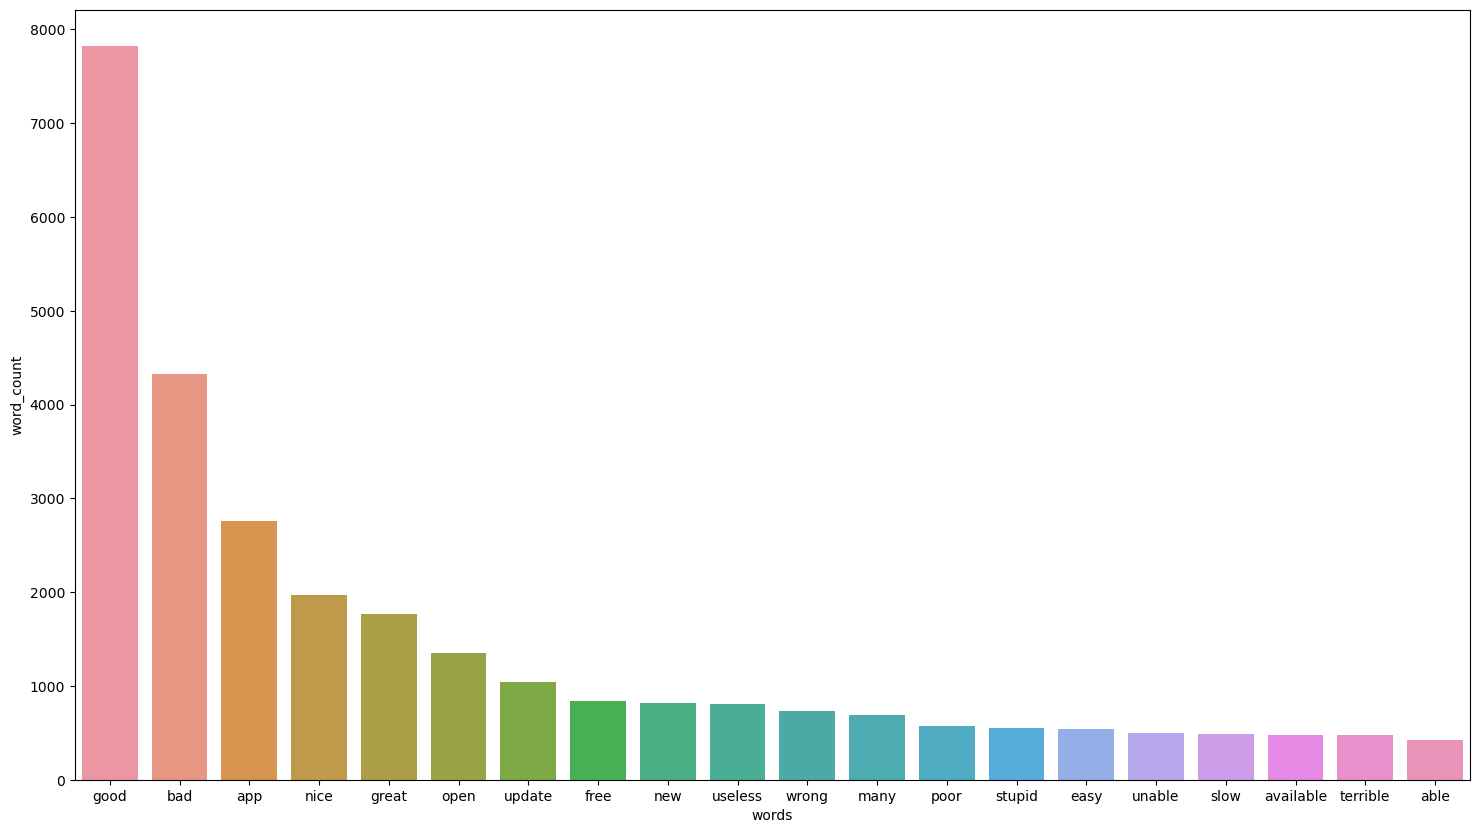

In [47]:
plt.figure(figsize= (18,10))

sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

Berdasarkan hasil perhitungan frekuensi yang ditampilkan dalam DataFrame lalu divisualisasikan dapat disimpulkan bahwa kata sifat yang sering muncul adalah kata "good" yaitu sebanyak 7.819 kali dan kata sering muncul kedua adalah kata "bad" dengan muncul sebanyak 4.326 kali. Sedangkan kata sifat yang jarang atau sedikit muncul adalah kata "able" sebanyak <1000 kali.

In [48]:
reviews_data = pd.read_csv("C:/Users/hp/Downloads/cleaned_reviews_no_stopwords_data.csv")

## Performing Stemming and Lemmatization

Stemming merupakan proses mereduksi kata menjadi akar atau bentuk dasarnya sehingga mampu meningkatkan keakuratan analisis karena beberapa variasi kata yang sama dapat menyebabkan noise dalam
data.

Lemmatization merupakan proses mereduksi kata juga tetapi proses ini mempertimbangkan konteks, jenis ujaran, struktur, dan bagian kata, seperti akar kata, prefiks, dan sufiks, serta konteks kata.

**1. Periksa tipe data dan hapus missing value**

In [49]:
reviews_data.dtypes

content                      object
score                         int64
reviews_cleaned              object
reviews_cleaned_stopwords    object
dtype: object

In [50]:
reviews_data = reviews_data.dropna()

**2. Melakukan tokenisasi**

In [51]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned_stopwords'].apply(word_tokenize)

**3. Melakukan Stemming**

In [52]:
stemmer = nltk.PorterStemmer()
reviews_data['reviews_stemmed_data'] = reviews_data['reviews_tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])
reviews_data.head()

,content,score,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data
0,"Chose a location and after paying, order was s...",1,chose a location and after paying order was se...,chose location paying order sent another locat...,"[chose, location, paying, order, sent, another...","[chose, locat, pay, order, sent, anoth, locat,..."
1,"Getting worst and worst. Ordered using app, ga...",1,getting worst and worst ordered using app gave...,getting worst worst ordered using app gave ord...,"[getting, worst, worst, ordered, using, app, g...","[get, worst, worst, order, use, app, gave, ord..."
2,"Still terrible user experience, after a year o...",1,still terrible user experience after a year or...,still terrible user experience year one bother...,"[still, terrible, user, experience, year, one,...","[still, terribl, user, experi, year, one, both..."
3,"""There was a problem getting the location deta...",1,`` there was a problem getting the location de...,`` problem getting location details `` interne...,"[``, problem, getting, location, details, ``, ...","[``, problem, get, locat, detail, ``, internet..."
4,Wasted 15 mins putting in my order only to fin...,1,wasted 15 mins putting in my order only to fin...,wasted 15 mins putting order find use vouchers...,"[wasted, 15, mins, putting, order, find, use, ...","[wast, 15, min, put, order, find, use, voucher..."


Melakukan steamming menggunakan PorterStemmer class in nltk yang inisialisasikan dulu. Menambhkan kolom baru yaitu  'reviews_stemmed_data', di mana berisi daftar kata yang telah distem dan sesuai dengan kata-kata asli yang telah di-tokenisasi dalam kolom 'reviews_tokenized'. 

**4. Melakukan Tag Pos**

In [53]:
reviews_data['reviews_pos_tags'] = reviews_data['reviews_tokenized'].apply(nltk.tag.pos_tag)
reviews_data.head()

,content,score,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags
0,"Chose a location and after paying, order was s...",1,chose a location and after paying order was se...,chose location paying order sent another locat...,"[chose, location, paying, order, sent, another...","[chose, locat, pay, order, sent, anoth, locat,...","[(chose, JJ), (location, NN), (paying, VBG), (..."
1,"Getting worst and worst. Ordered using app, ga...",1,getting worst and worst ordered using app gave...,getting worst worst ordered using app gave ord...,"[getting, worst, worst, ordered, using, app, g...","[get, worst, worst, order, use, app, gave, ord...","[(getting, VBG), (worst, JJS), (worst, RB), (o..."
2,"Still terrible user experience, after a year o...",1,still terrible user experience after a year or...,still terrible user experience year one bother...,"[still, terrible, user, experience, year, one,...","[still, terribl, user, experi, year, one, both...","[(still, RB), (terrible, JJ), (user, NN), (exp..."
3,"""There was a problem getting the location deta...",1,`` there was a problem getting the location de...,`` problem getting location details `` interne...,"[``, problem, getting, location, details, ``, ...","[``, problem, get, locat, detail, ``, internet...","[(``, ``), (problem, NN), (getting, VBG), (loc..."
4,Wasted 15 mins putting in my order only to fin...,1,wasted 15 mins putting in my order only to fin...,wasted 15 mins putting order find use vouchers...,"[wasted, 15, mins, putting, order, find, use, ...","[wast, 15, min, put, order, find, use, voucher...","[(wasted, VBD), (15, CD), (mins, NNS), (puttin..."


Membuat kolom baru berisi tag pos atau kata yang sudah dikelompokan sesuai jenisnya

**5. Membuat Fungsi**

In [54]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
reviews_data['reviews_wordnet_pos_tags'] = reviews_data['reviews_pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
reviews_data.head()

,content,score,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags,reviews_wordnet_pos_tags
0,"Chose a location and after paying, order was s...",1,chose a location and after paying order was se...,chose location paying order sent another locat...,"[chose, location, paying, order, sent, another...","[chose, locat, pay, order, sent, anoth, locat,...","[(chose, JJ), (location, NN), (paying, VBG), (...","[(chose, a), (location, n), (paying, v), (orde..."
1,"Getting worst and worst. Ordered using app, ga...",1,getting worst and worst ordered using app gave...,getting worst worst ordered using app gave ord...,"[getting, worst, worst, ordered, using, app, g...","[get, worst, worst, order, use, app, gave, ord...","[(getting, VBG), (worst, JJS), (worst, RB), (o...","[(getting, v), (worst, a), (worst, r), (ordere..."
2,"Still terrible user experience, after a year o...",1,still terrible user experience after a year or...,still terrible user experience year one bother...,"[still, terrible, user, experience, year, one,...","[still, terribl, user, experi, year, one, both...","[(still, RB), (terrible, JJ), (user, NN), (exp...","[(still, r), (terrible, a), (user, n), (experi..."
3,"""There was a problem getting the location deta...",1,`` there was a problem getting the location de...,`` problem getting location details `` interne...,"[``, problem, getting, location, details, ``, ...","[``, problem, get, locat, detail, ``, internet...","[(``, ``), (problem, NN), (getting, VBG), (loc...","[(``, n), (problem, n), (getting, v), (locatio..."
4,Wasted 15 mins putting in my order only to fin...,1,wasted 15 mins putting in my order only to fin...,wasted 15 mins putting order find use vouchers...,"[wasted, 15, mins, putting, order, find, use, ...","[wast, 15, min, put, order, find, use, voucher...","[(wasted, VBD), (15, CD), (mins, NNS), (puttin...","[(wasted, v), (15, n), (mins, n), (putting, v)..."


Fungsi ini dibuat untuk me-konversi tag POS menjadi format wordnet untuk proses lemmatisasi.  Misalnya, jika tag dimulai dengan 'J', itu dianggap sebagai kata sifat (adjective) dan diwakili oleh konstanta wordnet.ADJ dengan kata lain setiap tag POS diubah menjadi pasangan kata dan jenis kata yang sesuai dengan WordNet. Sehingga ditampilkan kolom baru yang berisi daftar pasangan kata dan jenis kata.

**6. Melakukan Lemmatization**

In [55]:
lemmatizer = WordNetLemmatizer()
reviews_data['reviews_lemmatized'] = reviews_data['reviews_wordnet_pos_tags'].apply(lambda x: [lemmatizer.lemmatize(word, tag) for word, tag in x])
reviews_data.head()

,content,score,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags,reviews_wordnet_pos_tags,reviews_lemmatized
0,"Chose a location and after paying, order was s...",1,chose a location and after paying order was se...,chose location paying order sent another locat...,"[chose, location, paying, order, sent, another...","[chose, locat, pay, order, sent, anoth, locat,...","[(chose, JJ), (location, NN), (paying, VBG), (...","[(chose, a), (location, n), (paying, v), (orde...","[chose, location, pay, order, send, another, l..."
1,"Getting worst and worst. Ordered using app, ga...",1,getting worst and worst ordered using app gave...,getting worst worst ordered using app gave ord...,"[getting, worst, worst, ordered, using, app, g...","[get, worst, worst, order, use, app, gave, ord...","[(getting, VBG), (worst, JJS), (worst, RB), (o...","[(getting, v), (worst, a), (worst, r), (ordere...","[get, bad, worst, order, use, app, give, order..."
2,"Still terrible user experience, after a year o...",1,still terrible user experience after a year or...,still terrible user experience year one bother...,"[still, terrible, user, experience, year, one,...","[still, terribl, user, experi, year, one, both...","[(still, RB), (terrible, JJ), (user, NN), (exp...","[(still, r), (terrible, a), (user, n), (experi...","[still, terrible, user, experience, year, one,..."
3,"""There was a problem getting the location deta...",1,`` there was a problem getting the location de...,`` problem getting location details `` interne...,"[``, problem, getting, location, details, ``, ...","[``, problem, get, locat, detail, ``, internet...","[(``, ``), (problem, NN), (getting, VBG), (loc...","[(``, n), (problem, n), (getting, v), (locatio...","[``, problem, get, location, detail, ``, inter..."
4,Wasted 15 mins putting in my order only to fin...,1,wasted 15 mins putting in my order only to fin...,wasted 15 mins putting order find use vouchers...,"[wasted, 15, mins, putting, order, find, use, ...","[wast, 15, min, put, order, find, use, voucher...","[(wasted, VBD), (15, CD), (mins, NNS), (puttin...","[(wasted, v), (15, n), (mins, n), (putting, v)...","[waste, 15, min, put, order, find, use, vouche..."


Melakukan lemmatisasi menggunakan WordNetLemmatizer class in nltk. Dari proses lemmatisasi dihasilkan kolom baru yaitu 'reviews_lemmatized' yang berisi daftar kata-kata yang telah dilemmatisasi. Jadi untuk melakukan lemmatisasi diperlukan POS tag agar hasil lebih akurat karena beberapa kata dapat memiliki kata dasar yang berbeda tergantung pada jenis kata. Misalnya, kata "better" dapat menjadi "good", dimana kata "good" sebagai kata benda dan "better" sebagai kata kerja.

**8. Me-konversi dari list ke string**

In [56]:
reviews_data['reviews_cleaned_lemmatized'] = [' '.join(l) for l in reviews_data['reviews_lemmatized']]
reviews_data.head()

,content,score,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags,reviews_wordnet_pos_tags,reviews_lemmatized,reviews_cleaned_lemmatized
0,"Chose a location and after paying, order was s...",1,chose a location and after paying order was se...,chose location paying order sent another locat...,"[chose, location, paying, order, sent, another...","[chose, locat, pay, order, sent, anoth, locat,...","[(chose, JJ), (location, NN), (paying, VBG), (...","[(chose, a), (location, n), (paying, v), (orde...","[chose, location, pay, order, send, another, l...",chose location pay order send another location...
1,"Getting worst and worst. Ordered using app, ga...",1,getting worst and worst ordered using app gave...,getting worst worst ordered using app gave ord...,"[getting, worst, worst, ordered, using, app, g...","[get, worst, worst, order, use, app, gave, ord...","[(getting, VBG), (worst, JJS), (worst, RB), (o...","[(getting, v), (worst, a), (worst, r), (ordere...","[get, bad, worst, order, use, app, give, order...",get bad worst order use app give order number ...
2,"Still terrible user experience, after a year o...",1,still terrible user experience after a year or...,still terrible user experience year one bother...,"[still, terrible, user, experience, year, one,...","[still, terribl, user, experi, year, one, both...","[(still, RB), (terrible, JJ), (user, NN), (exp...","[(still, r), (terrible, a), (user, n), (experi...","[still, terrible, user, experience, year, one,...",still terrible user experience year one bother...
3,"""There was a problem getting the location deta...",1,`` there was a problem getting the location de...,`` problem getting location details `` interne...,"[``, problem, getting, location, details, ``, ...","[``, problem, get, locat, detail, ``, internet...","[(``, ``), (problem, NN), (getting, VBG), (loc...","[(``, n), (problem, n), (getting, v), (locatio...","[``, problem, get, location, detail, ``, inter...",`` problem get location detail `` internet wor...
4,Wasted 15 mins putting in my order only to fin...,1,wasted 15 mins putting in my order only to fin...,wasted 15 mins putting order find use vouchers...,"[wasted, 15, mins, putting, order, find, use, ...","[wast, 15, min, put, order, find, use, voucher...","[(wasted, VBD), (15, CD), (mins, NNS), (puttin...","[(wasted, v), (15, n), (mins, n), (putting, v)...","[waste, 15, min, put, order, find, use, vouche...",waste 15 min put order find use voucher self s...


Menghasilkan kolom baru yaitu 'reviews_cleaned_lemmatized'yang berisi teks yang telah dilemmatisasi dan digabungkan kembali menjadi satu string untuk setiap baris dalam DataFrame.

**9. Menggabungkan semua kata yang sudah di tokensisasi dalam list**

In [57]:
def combine_words(word_list):    
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

**10. Menghitung Frekuensi**

In [58]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:20]

**11. Membuat list semua kata yang sudah di tokenisasi**

In [59]:
reviews = reviews_data['reviews_lemmatized']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['chose',
 'location',
 'pay',
 'order',
 'send',
 'another',
 'location',
 'frustrate',
 'restaurant',
 'phone']

**12. Membuat DataFrame hasil perhitungan frekuensi**

In [60]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
24,app,17981
278,good,8075
29,bad,6500
86,work,5015
3,order,4601


Semua step di atas (dari step 8) merupakan proses menggabungkan kata-kata dari review yang telah dibersihkan dan menghitung frekuensinya, kemudian mengembalikan DataFrame yang berisi 20 kata teratas bersama dengan frekuensinya. Dimana pertama memberikan token pada tiap kata seperti sebelumnya di data preparation, kemudian semua kata di tampung dalam argumen 'all_word' dan semua list kata tersebut ditampilkan pada step 11. Selanjutnya dengan menggunakan fungsi 'count_topwords' kita dapat menghitung frekuensi tiap kata dalam list 'all_word', setelah perhitungan selesai akan dibuat DataFrame yang menampilkan 5 data teratas dengan nilai frekuensi terbesar hingga terkecil.

note:: ini penjelasan dari step 8 sampe 12 di atas ya

**13. Visualisasi**

<AxesSubplot:xlabel='words', ylabel='word_count'>

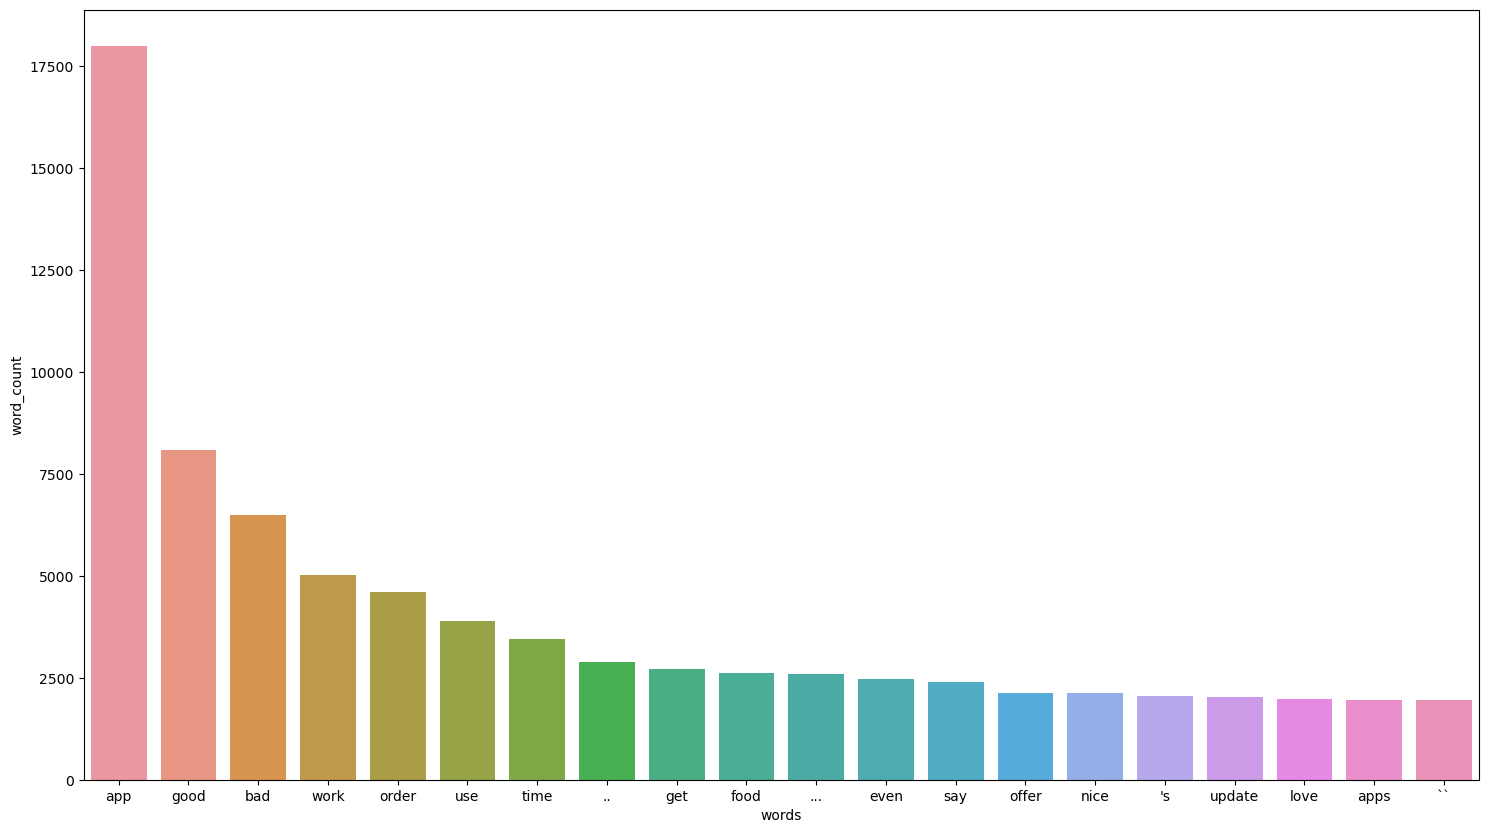

In [61]:
plt.figure(figsize= (18,10))
sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

Berdasarkan hasil perhitungan frekuensi dari sudah dilemmatisasi yang ditampilkan dalam DataFrame lalu divisualisasikan dalam bentuk barplot dapat disimpulkan bahwa kata sifat yang sering muncul adalah kata "app" yaitu sebanyak 17.984 kali dan kata sering muncul kedua adalah kata "good" dengan muncul sebanyak 8.075 kali. Sedangkan kata sifat yang jarang atau sedikit muncul adalah kata "apps" sebanyak < 2.500 kali.

In [62]:
reviews_data[['content','score','reviews_cleaned_lemmatized',"reviews_cleaned"]].to_csv("C:/Users/hp/Downloads/cleaned_reviews_lemmatized_data.csv",index = False)

# Analyzing N-grams

N-gram adalah barisan kontinu dari n item teks tertentu. N adalah singkatan dari nilai numerik positif, mulai dari 1 hingga n . N-gram yang paling umum adalah unigram, bigram, dan trigram, dengan n masing-masing adalah 1, 2, dan 3. N-gram digunakan untuk mengekstrak informasi berguna tentang distribusi kata, suku kata, atau huruf dalam teks sehingga mampu mengidentifikasi kata, suku kata, atau frasa paling umum dalam data.

In [63]:
reviews_data = pd.read_csv("C:/Users/hp/Downloads/cleaned_reviews_no_stopwords_data.csv")
reviews_data.head()

,content,score,reviews_cleaned,reviews_cleaned_stopwords
0,"Chose a location and after paying, order was s...",1,chose a location and after paying order was se...,chose location paying order sent another locat...
1,"Getting worst and worst. Ordered using app, ga...",1,getting worst and worst ordered using app gave...,getting worst worst ordered using app gave ord...
2,"Still terrible user experience, after a year o...",1,still terrible user experience after a year or...,still terrible user experience year one bother...
3,"""There was a problem getting the location deta...",1,`` there was a problem getting the location de...,`` problem getting location details `` interne...
4,Wasted 15 mins putting in my order only to fin...,1,wasted 15 mins putting in my order only to fin...,wasted 15 mins putting order find use vouchers...


In [64]:
reviews_data.shape

(62190, 4)

In [65]:
reviews_data = reviews_data.dropna()

In [66]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned_stopwords'].apply(word_tokenize)

* **Mengekstrak N-grams**

In [67]:
def extract_ngrams(tokenized_data,n):
    ngrams_list = list(nltk.ngrams(tokenized_data, n))
    ngrams_str = [' '.join(grams) for grams in ngrams_list]
    return ngrams_str

Untuk mengekstrak n-gram dari data teks diperlukan fungsi ngrams di nltk untuk mengambil data yang telah di-tokenisasi dan menghasilkan n-gram dari panjang tertentu, di mana setiap n-gram direpresentasikan sebagai satu string dengan kata-kata yang digabungkan oleh spasi. 

In [68]:
reviews_data['reviews_ngrams'] = reviews_data['reviews_tokenized'].apply(lambda x: extract_ngrams(x, 2))
reviews_data.head()

,content,score,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_ngrams
0,"Chose a location and after paying, order was s...",1,chose a location and after paying order was se...,chose location paying order sent another locat...,"[chose, location, paying, order, sent, another...","[chose location, location paying, paying order..."
1,"Getting worst and worst. Ordered using app, ga...",1,getting worst and worst ordered using app gave...,getting worst worst ordered using app gave ord...,"[getting, worst, worst, ordered, using, app, g...","[getting worst, worst worst, worst ordered, or..."
2,"Still terrible user experience, after a year o...",1,still terrible user experience after a year or...,still terrible user experience year one bother...,"[still, terrible, user, experience, year, one,...","[still terrible, terrible user, user experienc..."
3,"""There was a problem getting the location deta...",1,`` there was a problem getting the location de...,`` problem getting location details `` interne...,"[``, problem, getting, location, details, ``, ...","[`` problem, problem getting, getting location..."
4,Wasted 15 mins putting in my order only to fin...,1,wasted 15 mins putting in my order only to fin...,wasted 15 mins putting order find use vouchers...,"[wasted, 15, mins, putting, order, find, use, ...","[wasted 15, 15 mins, mins putting, putting ord..."


Jadi setelah proses ekstraksi dihasikan kolom baru yaitu 'review_ngrams' yang berisi n-gram (pasangan kata) dari setiap baris data yang telah di-tokenisasi. Dengan menentukan panjang n-gram sebagai 2, menghasilkan bigram dari teks. 

In [69]:
def combine_words(word_list):    
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [70]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:10]

In [71]:
reviews = reviews_data['reviews_ngrams']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['chose location',
 'location paying',
 'paying order',
 'order sent',
 'sent another',
 'another location',
 'location frustrating',
 'frustrating restaurants',
 'restaurants phone',
 'phone created']

In [72]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head(5)

,words,word_count
464,mcdonald 's,1499
557,worst app,997
558,app ever,713
1254,security check,665
2390,good app,647


Semua step di atas (dari def combine) merupakan proses menggabungkan kata-kata dari review yang telah dibersihkan dan menghitung frekuensinya, kemudian mengembalikan DataFrame yang berisi 20 kata teratas bersama dengan frekuensinya. Dimana pertama memberikan token pada tiap kata seperti sebelumnya di data preparation, kemudian semua kata di tampung dalam argumen 'all_word' dan semua list kata tersebut ditampilkan pada argumen reviews_words. Selanjutnya dengan menggunakan fungsi 'count_topwords' untuk menghitung frekuensi tiap kata dalam list 'all_word', setelah perhitungan selesai akan dibuat DataFrame yang menampilkan 5 data teratas dengan nilai frekuensi terbesar hingga terkecil.

note:: ini penjelasannya sama kek awal tadi

<AxesSubplot:xlabel='words', ylabel='word_count'>

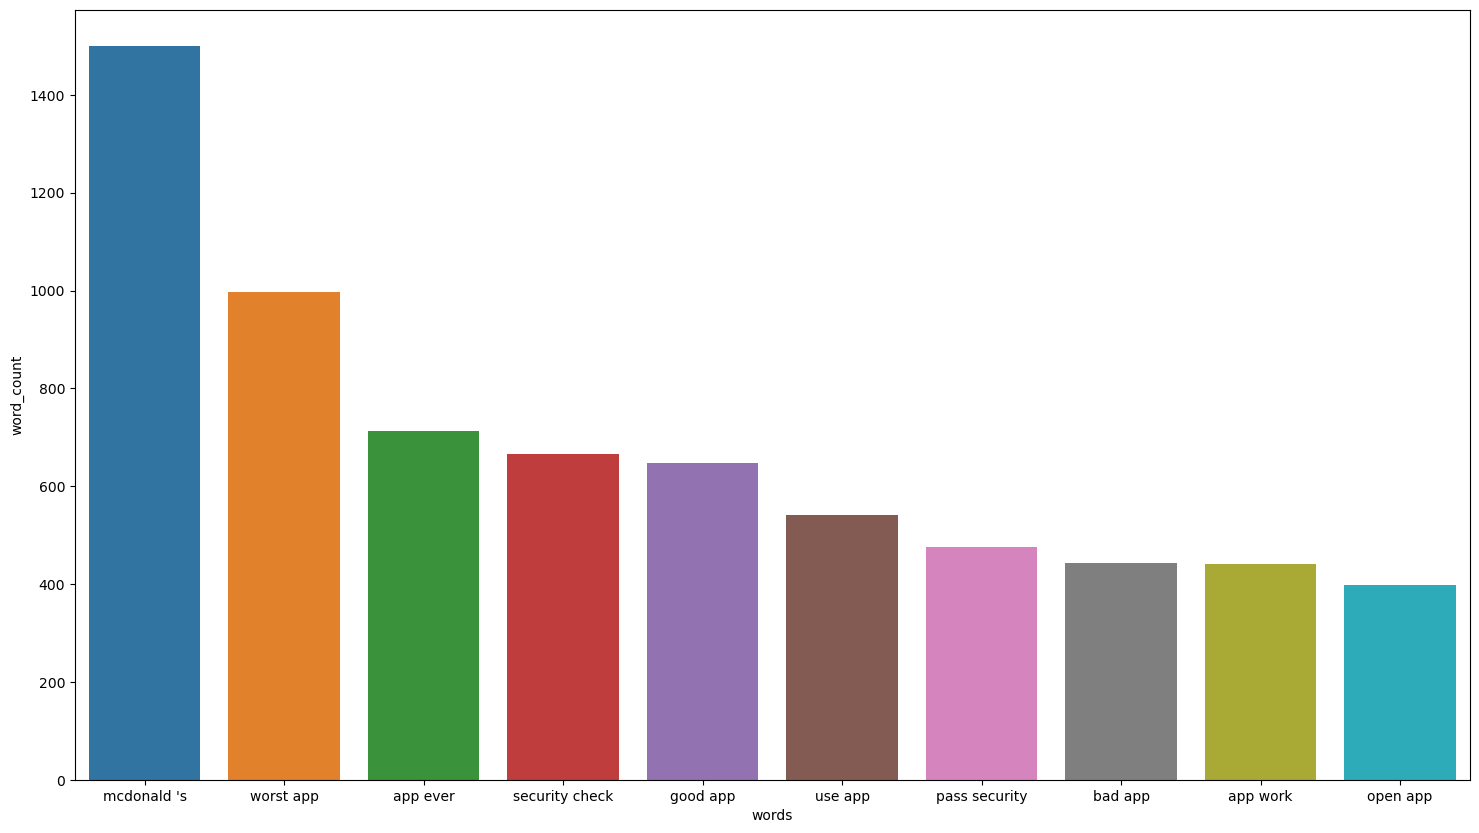

In [73]:
plt.figure(figsize= (18,10))
sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

Berdasarkan hasil perhitungan frekuensi ynag telah di n-gram kan lalu divisualisasikan dalam bentuk barplot dapat disimpulkan bahwa kata yang sering muncul adalah kata "mcdonald's" yaitu sebanyak 1.499 kali dan kata sering muncul kedua adalah kata "worst app" dengan muncul sebanyak 9997 kali. Sedangkan kata  yang jarang atau sedikit muncul adalah kata "open app" sebanyak < 400 kali.

# Creating Word Clouds

In [74]:
reviews_data = pd.read_csv("C:/Users/hp/Downloads/cleaned_reviews_lemmatized_data.csv")
reviews_data.head()

,content,score,reviews_cleaned_lemmatized,reviews_cleaned
0,"Chose a location and after paying, order was s...",1,chose location pay order send another location...,chose a location and after paying order was se...
1,"Getting worst and worst. Ordered using app, ga...",1,get bad worst order use app give order number ...,getting worst and worst ordered using app gave...
2,"Still terrible user experience, after a year o...",1,still terrible user experience year one bother...,still terrible user experience after a year or...
3,"""There was a problem getting the location deta...",1,`` problem get location detail `` internet wor...,`` there was a problem getting the location de...
4,Wasted 15 mins putting in my order only to fin...,1,waste 15 min put order find use voucher self s...,wasted 15 mins putting in my order only to fin...


In [75]:
reviews_data.shape

(62118, 4)

In [76]:
reviews_data = reviews_data.dropna()

In [77]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned_lemmatized'].apply(word_tokenize)

In [78]:
def combine_words(word_list):    
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [79]:
reviews = reviews_data['reviews_tokenized']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['chose',
 'location',
 'pay',
 'order',
 'send',
 'another',
 'location',
 'frustrate',
 'restaurant',
 'phone']

Proses menggabungkan kata-kata dari review yang telah dibersihkan, dimana pertama memberikan token pada tiap kata seperti sebelumnya di data preparation, kemudian semua kata di tampung dalam argumen 'all_word' dan semua list kata tersebut ditampilkan pada argumen reviews_words. 

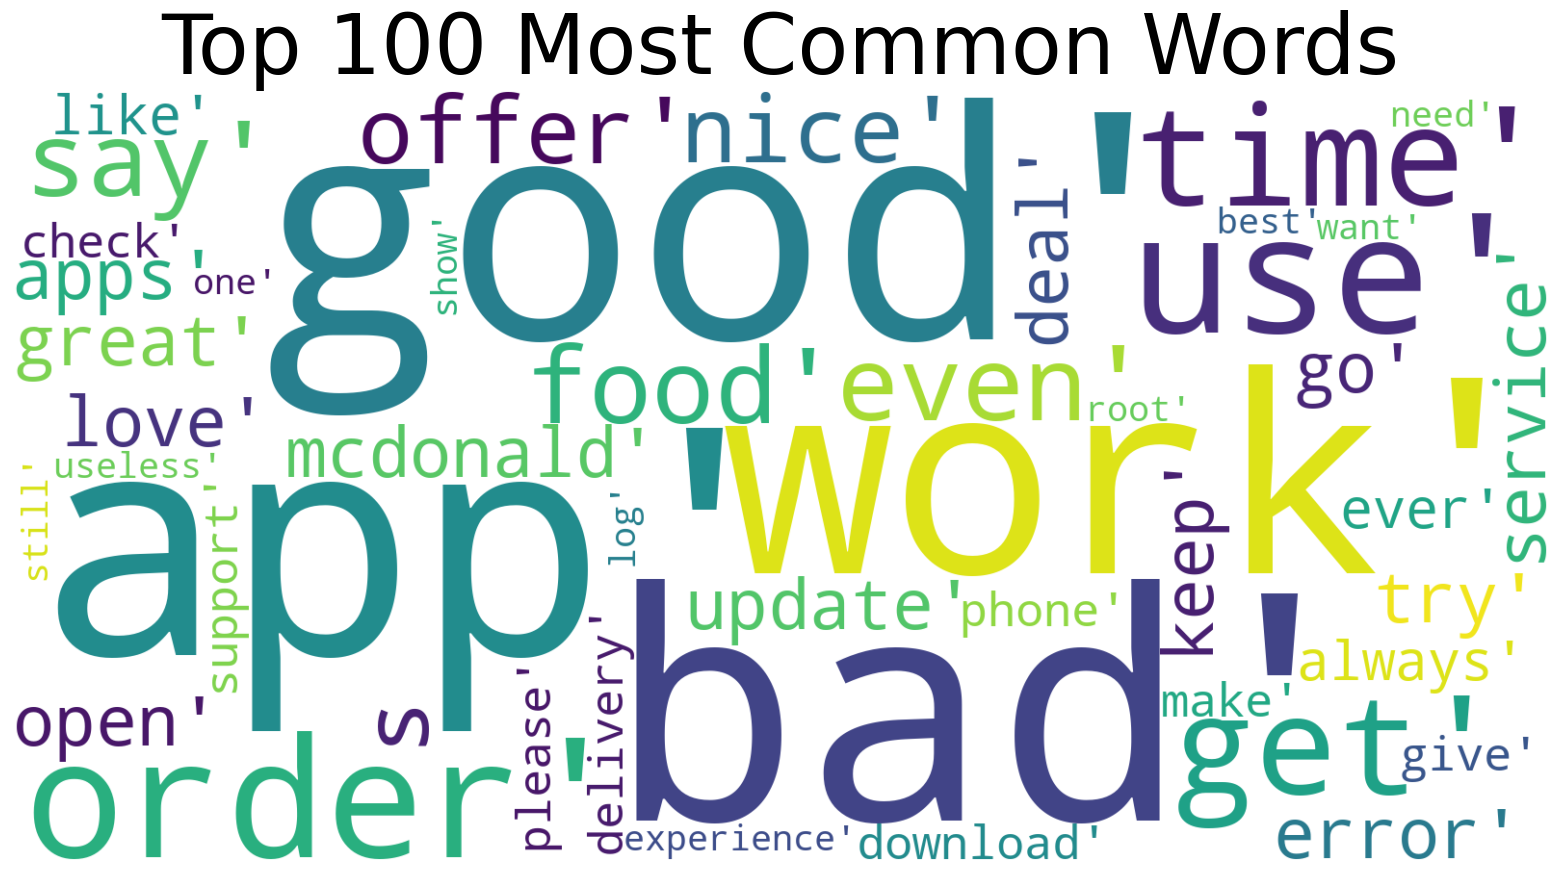

In [80]:
mostcommon = FreqDist(reviews_words).most_common(50)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(40,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=60)
plt.show()

Hasil akhirnya adalah word cloud  menampilkan 50 kata paling umum dalam data review, dimana ukuran kata-kata merepresentasikan frekuensinya, sehinggga memberikan representasi visual yang cepat tentang kata-kata yang paling sering muncul dalam data tersebut. Berdasarkan visualisi di atas disimpulkan bahwa kata "good", "bad", dan "app" menjadi kata yang sering muncul karena memiliki nilai frekuensi tinggi sehingga ukuran ketiga pali besar atau domnan daripada kata=kata lainnya.

* **Mencari kata yang memiliki hubungan dengan pro israel**  

In [81]:
most_word_reviews_data = reviews_data[['content', 'score']]
reviews_data[reviews_data['content'].str.contains('terrorist')]

,content,score,reviews_cleaned_lemmatized,reviews_cleaned,reviews_tokenized
2785,used to be one of my favourite snack outlets b...,1,use one favourite snack outlet consider think ...,used to be one of my favourite snack outlets b...,"[use, one, favourite, snack, outlet, consider,..."
2812,Supporting terrorists Uninstall and not buying...,1,support terrorist uninstall buying anymore,supporting terrorists uninstall and not buying...,"[support, terrorist, uninstall, buying, anymore]"
5241,"We buy from you meat, and you transfer this me...",1,buy meat transfer meat bomb kill baby support ...,we buy from you meat and you transfer this mea...,"[buy, meat, transfer, meat, bomb, kill, baby, ..."
5262,Helping terrorists to killed children and help...,1,help terrorist kill child help occupation country,helping terrorists to killed children and help...,"[help, terrorist, kill, child, help, occupatio..."
5280,"We didn't support to terrorist,, We stand with...",1,support terrorist stand humanity,we did not support to terrorist we stand with ...,"[support, terrorist, stand, humanity]"
...,...,...,...,...,...
57850,support terrorist,1,support terrorist,support terrorist,"[support, terrorist]"
58403,Support terrorists,1,support terrorist,support terrorists,"[support, terrorist]"
58472,Supporting terrorists,1,support terrorist,supporting terrorists,"[support, terrorist]"
58473,Supporting terrorists,1,support terrorist,supporting terrorists,"[support, terrorist]"


In [82]:
most_word_reviews_data = reviews_data[['content', 'score']]
reviews_data[reviews_data['content'].str.contains('boycot')]

,content,score,reviews_cleaned_lemmatized,reviews_cleaned,reviews_tokenized
468,Doesn't let me past the welcome screen. It say...,1,let past welcome screen say phone safe stupid ...,does not let me past the welcome screen it say...,"[let, past, welcome, screen, say, phone, safe,..."
1573,"Had bad experiences with the app, unfriendly U...",1,bad experience app unfriendly ui main reason m...,had bad experiences with the app unfriendly ui...,"[bad, experience, app, unfriendly, ui, main, r..."
2339,edit: after latest update i will never visit t...,1,edit late update never visit strongly recommen...,edit after latest update i will never visit th...,"[edit, late, update, never, visit, strongly, r..."
2355,"Poisonous food, very unhealthy, i highly recom...",1,poisonous food unhealthy highly recommend eat ...,poisonous food very unhealthy i highly recomme...,"[poisonous, food, unhealthy, highly, recommend..."
4233,"It's a baddest restaurant in the world, everyt...",1,baddest restaurant world everything expensive ...,it is a baddest restaurant in the world everyt...,"[baddest, restaurant, world, everything, expen..."
...,...,...,...,...,...
52110,I haven't been to McD in quite a while. No not...,1,mcd quite notification whatsoever go one morni...,i have not been to mcd in quite a while no not...,"[mcd, quite, notification, whatsoever, go, one..."
54928,boycott ✌️,1,boycott ✌️,boycott ✌️,"[boycott, ✌️]"
59007,boycott,1,boycott,boycott,[boycott]
59020,boycott,1,boycott,boycott,[boycott]


In [95]:
most_word_reviews_data = reviews_data[['content', 'score']]
reviews_data[reviews_data['content'].str.contains('israel')]

,content,score,reviews_cleaned_lemmatized,reviews_cleaned,reviews_tokenized
3057,Absolute bias towards israel.,1,absolute bias towards israel,absolute bias towards israel,"[absolute, bias, towards, israel]"
5278,support israel ... they don't know where is th...,1,support israel ... know right,support israel ... they do not know where is t...,"[support, israel, ..., know, right]"
7804,Absolute bias towards israel,1,absolute bias towards israel,absolute bias towards israel,"[absolute, bias, towards, israel]"
8102,Abolute bias for the apartheid state of israel,1,abolute bias apartheid state israel,abolute bias for the apartheid state of israel,"[abolute, bias, apartheid, state, israel]"
9032,Absolute bias towards israel,1,absolute bias towards israel,absolute bias towards israel,"[absolute, bias, towards, israel]"
11600,I stop eating mcd to support Palestinians who ...,1,stop eat mcd support palestinian massacre isra...,i stop eating mcd to support palestinians who ...,"[stop, eat, mcd, support, palestinian, massacr..."
12140,It's biased to israel,1,bias israel,it is biased to israel,"[bias, israel]"
17680,Apsolute bias towards israel,1,apsolute bias towards israel,apsolute bias towards israel,"[apsolute, bias, towards, israel]"
21075,Absolute bias towards israel,1,absolute bias towards israel,absolute bias towards israel,"[absolute, bias, towards, israel]"
21299,it supports israel against palastin and this i...,1,support israel palastin unfair,it supports israel against palastin and this i...,"[support, israel, palastin, unfair]"


Dari kedua kode di atas kita dapat mencari kata yang memiliki hubungan pada kata 'terrorist', 'boycot', dan 'israel' sehingga bisa dilihat jika ternyata orang luar negeri juga kurang setuju dikarenakan Mcdonals merupakan perusahaan pro israel. Bisa dilihat dari komentar atau riview kata 'terrorist' memiliki paling banyak sering muncul yaitu terdapat 112 baris yang mengatakan jika Mcd merupakan salah satu perusahaan yang pro terhadap israel.